<a href="https://colab.research.google.com/github/SharmaPankaj3/First/blob/main/Sentiment_Analysis_Based_on_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#VADER stands for Valence Aware Dictionary and sEntiment Reasoner,
#and it is a pre-trained sentiment analysis tool that is particularly useful
#for analyzing sentiment in texts, especially social media content.
from wordcloud import WordCloud
nltk.download('punkt')
#The Punkt tokenizer is a pre-trained unsupervised machine learning model for tokenizing text into sentences.
#Tokenization is the process of breaking down a text into individual units, such as words or sentences.
nltk.download('stopwords')
nltk.download('vader_lexicon')
#VADER is a lexicon and rule-based sentiment analysis tool designed to analyze the sentiment of text, especially in the context of social media content.
#It is particularly useful for understanding sentiment in short and informal texts.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# Now run your code
file_path = "/content/drive/MyDrive/speech.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    speech_text = file.read()
    print(file_path)

/content/drive/MyDrive/speech.txt


In [4]:
file_path

'/content/drive/MyDrive/speech.txt'

In [5]:
speech_text

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [6]:
speech_text_cleaned = re.sub(r'[^\w\s]', ' ', speech_text)

In [7]:
speech_text_cleaned

' I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government \n\n Many key legislations did not get the discussion they deserved as the opposition put politics above them \n\n This time period of the 21st century will impact the country for the next thousand years  We all should have a single focus \n\n We have given the youth of India a government free of scams \n\n Today a trust has arisen in the heart of the poor to fulfill his dreams \n\n Opposition is not able to see the trust of people as they are so steeped in distrust \n\n In 2028  when you will bring a No Confidence Motion  the Country will be among the top 3 \n\n Opposition believes in changing names but they can t change their work culture \n\n Freedom fighters and founding fathers of the country always opposed dynasty politics \n\n Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [8]:
speech_text_cleaned= speech_text_cleaned.lower()

In [9]:
speech_text_cleaned

' i have come to express immense gratitude towards each and every citizen of india for repeatedly showing their trust in the government \n\n many key legislations did not get the discussion they deserved as the opposition put politics above them \n\n this time period of the 21st century will impact the country for the next thousand years  we all should have a single focus \n\n we have given the youth of india a government free of scams \n\n today a trust has arisen in the heart of the poor to fulfill his dreams \n\n opposition is not able to see the trust of people as they are so steeped in distrust \n\n in 2028  when you will bring a no confidence motion  the country will be among the top 3 \n\n opposition believes in changing names but they can t change their work culture \n\n freedom fighters and founding fathers of the country always opposed dynasty politics \n\n crimes against women are unacceptable and the central government and the state government will work to ensure that the g

In [10]:
words = word_tokenize(speech_text_cleaned)

In [ ]:
words

['i',
 'have',
 'come',
 'to',
 'express',
 'immense',
 'gratitude',
 'towards',
 'each',
 'and',
 'every',
 'citizen',
 'of',
 'india',
 'for',
 'repeatedly',
 'showing',
 'their',
 'trust',
 'in',
 'the',
 'government',
 'many',
 'key',
 'legislations',
 'did',
 'not',
 'get',
 'the',
 'discussion',
 'they',
 'deserved',
 'as',
 'the',
 'opposition',
 'put',
 'politics',
 'above',
 'them',
 'this',
 'time',
 'period',
 'of',
 'the',
 '21st',
 'century',
 'will',
 'impact',
 'the',
 'country',
 'for',
 'the',
 'next',
 'thousand',
 'years',
 'we',
 'all',
 'should',
 'have',
 'a',
 'single',
 'focus',
 'we',
 'have',
 'given',
 'the',
 'youth',
 'of',
 'india',
 'a',
 'government',
 'free',
 'of',
 'scams',
 'today',
 'a',
 'trust',
 'has',
 'arisen',
 'in',
 'the',
 'heart',
 'of',
 'the',
 'poor',
 'to',
 'fulfill',
 'his',
 'dreams',
 'opposition',
 'is',
 'not',
 'able',
 'to',
 'see',
 'the',
 'trust',
 'of',
 'people',
 'as',
 'they',
 'are',
 'so',
 'steeped',
 'in',
 'distrust

In [11]:
len(words)

3085

In [12]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
len(set(stopwords.words('english')))

179

In [14]:
stop_words=set(stopwords.words('english'))

In [15]:
word_filters = [word for word in words if word not in stop_words]
word_filters

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 

In [16]:
len(word_filters)

1608

In [17]:
#lemmatization gives meaningful reduction

lemmatizer = WordNetLemmatizer()

In [18]:
nltk.download('wordnet')

words_lemmatizer = [lemmatizer.lemmatize(word) for word in word_filters]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
words_lemmatizer

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 'manipur',

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
sentiment_scores = [sia.polarity_scores(word)['compound']for word in words_lemmatizer]

In [22]:
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [23]:
average_sentiment = sum(sentiment_scores)/ len(sentiment_scores)

In [24]:
average_sentiment

0.01488009950248756

In [25]:
print('The average sentiment is :', average_sentiment)

The average sentiment is : 0.01488009950248756


In [26]:
positive_words = [word for i, word in enumerate(word_filters)if sentiment_scores[i]>0.1]

In [27]:
positive_words

['gratitude',
 'trust',
 'free',
 'trust',
 'fulfill',
 'dreams',
 'trust',
 'confidence',
 'top',
 'freedom',
 'fighters',
 'ensure',
 'peace',
 'assure',
 'faith',
 'commitment',
 'party',
 'revered',
 'confidence',
 'gratitude',
 'trust',
 'confidence',
 'confidence',
 'strength',
 'confidence',
 'lucky',
 'confidence',
 'blessings',
 'better',
 'important',
 'interest',
 'party',
 'free',
 'energy',
 'determination',
 'huge',
 'dreams',
 'strengths',
 'dreams',
 'free',
 'courage',
 'opportunity',
 'confidence',
 'confidence',
 'growth',
 'trust',
 'fulfill',
 'dreams',
 'marvel',
 'helping',
 'save',
 'helping',
 'save',
 'helping',
 'save',
 'trust',
 'like',
 'wish',
 'well',
 'best',
 'profit',
 'increased',
 'success',
 'growing',
 'stronger',
 'responsible',
 'vision',
 'top',
 'definite',
 'confidence',
 'top',
 'faith',
 'like',
 'agree',
 'peace',
 'trusting',
 'trust',
 'certain',
 'opportunity',
 'trust',
 'trust',
 'confidence',
 'help',
 'parties',
 'faith',
 'dwelled'

In [28]:
len(positive_words)

140

In [29]:
negative_words = [word for i, word in enumerate (word_filters) if sentiment_scores[i]< -0.1]
negative_words

['scams',
 'poor',
 'distrust',
 'crimes',
 'unacceptable',
 'guilty',
 'punished',
 'pressure',
 'stop',
 'poor',
 'deprived',
 'betrayal',
 'disappointed',
 'scams',
 'stressed',
 'unsuccessful',
 'poor',
 'poverty',
 'poverty',
 'poor',
 'poor',
 'criticizing',
 'distrust',
 'bad',
 'bad',
 'criticism',
 'bad',
 'misinformation',
 'confuse',
 'scam',
 'crisis',
 'severely',
 'attacked',
 'ills',
 'questioned',
 'lack',
 'poverty',
 'hard',
 'distrusting',
 'lack',
 'strike',
 'enemy',
 'ill',
 'misinformed',
 'insecurity',
 'misinformed',
 'low',
 'fool',
 'arrogance',
 'arrogant',
 'contradictions',
 'damages',
 'suffered',
 'victims',
 'perturbed',
 'stuck',
 'warned',
 'havoc',
 'lamented',
 'reckless',
 'pressure',
 'violence',
 'saddening',
 'crimes',
 'unacceptable',
 'guilty',
 'punished',
 'protest',
 'failure',
 'attack',
 'neglect',
 'conflict',
 'forbidden',
 'forbidden',
 'loss',
 'lack',
 'pressure',
 'stop',
 'worse',
 'petty',
 'pain',
 'suffering']

In [30]:
neutral_words = [word for i, word in enumerate(word_filters)if sentiment_scores[i]>= -0.1 and sentiment_scores[i]<=0.1]
neutral_words

['come',
 'express',
 'immense',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'today',
 'arisen',
 'heart',
 'opposition',
 'able',
 'see',
 'people',
 'steeped',
 '2028',
 'bring',
 'motion',
 'country',
 'among',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'change',
 'work',
 'culture',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'women',
 'central',
 'government',
 'state',
 'government',
 'work',
 'manipur',
 'march',
 'path',
 'development',
 'people',
 'manipur',
 'mothers',
 'daughters',
 'manipur',
 'nation',
 'stands',
 'house',
 'stands',
 'government',
 'leave',
 'stone',
 'unturned',
 'manipur',
 'gets',
 'back',
 

In [31]:
print(" The positive words are :", positive_words)

 The positive words are : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'confidence', 'strength', 'confidence', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party

In [32]:
len(positive_words)

140

In [33]:
print(" The negative words are :", negative_words)

 The negative words are : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [34]:
len(negative_words)

82

In [35]:
print(" The neutral words are :", neutral_words)

 The neutral words are : ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 'priori

In [36]:
word_freq_positive = nltk.FreqDist(positive_words)
print(word_freq_positive)

<FreqDist with 74 samples and 140 outcomes>


In [37]:
word_freq_negative = nltk.FreqDist(negative_words)
print(word_freq_negative)

<FreqDist with 61 samples and 82 outcomes>


In [38]:
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_neutral)

<FreqDist with 651 samples and 1386 outcomes>


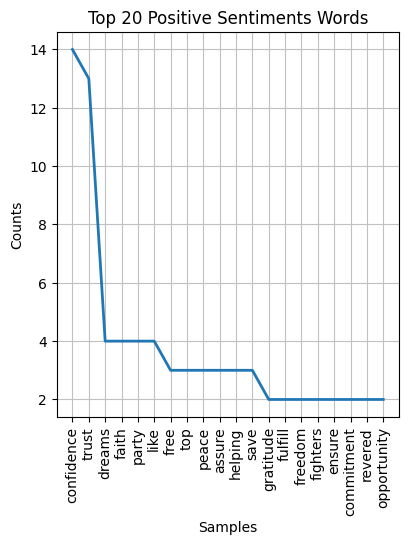

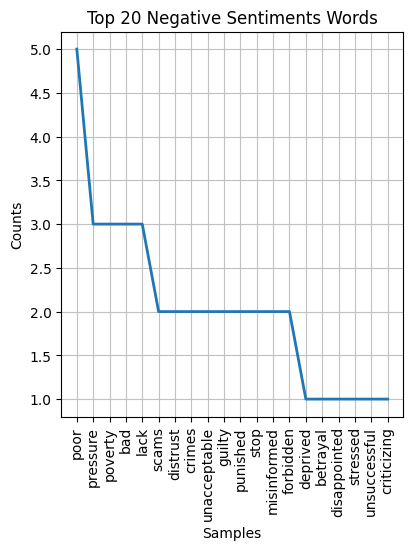

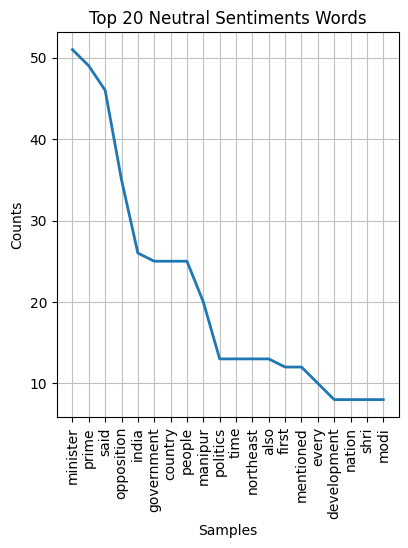

<Figure size 640x480 with 0 Axes>

In [39]:
# Visualization
plt.figure(figsize = (15,5))
plt.subplot(131)

word_freq_positive.plot(20,title ='Top 20 Positive Sentiments Words')

plt.figure(figsize = (15,5))
plt.subplot(132)

word_freq_negative.plot(20,title ='Top 20 Negative Sentiments Words')

plt.figure(figsize = (15,5))
plt.subplot(133)

word_freq_neutral.plot(20,title ='Top 20 Neutral Sentiments Words')


plt.tight_layout()
plt.show()

In [41]:
# Analysis

df_Positve = pd.DataFrame(word_freq_positive.most_common(20),columns = ['words','Frequency'])

df_Positve

,words,Frequency
0,confidence,14
1,trust,13
2,dreams,4
3,faith,4
4,party,4
5,like,4
6,free,3
7,top,3
8,peace,3
9,assure,3


In [42]:
df_negative = pd.DataFrame(word_freq_negative.most_common(20),columns = ['words','Frequency'])

df_negative

,words,Frequency
0,poor,5
1,pressure,3
2,poverty,3
3,bad,3
4,lack,3
5,scams,2
6,distrust,2
7,crimes,2
8,unacceptable,2
9,guilty,2


In [43]:
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20),columns = ['words','Frequency'])

df_neutral

,words,Frequency
0,minister,51
1,prime,49
2,said,46
3,opposition,35
4,india,26
5,government,25
6,country,25
7,people,25
8,manipur,20
9,politics,13


In [44]:
# Visualization

fig_Positive = px.bar(df_Positve, x = 'words',y =  'Frequency',title = 'Top 20 Positive Sentiment Words' )
fig_negative = px.bar(df_negative, x = 'words',y =  'Frequency',title = 'Top 20 Negative Sentiment Words')
fig_neutral = px.bar(df_neutral, x = 'words',y =  'Frequency',title = 'Top 20 Neutral Sentiment Words')
fig_Positive.show()
fig_negative.show()
fig_neutral.show()


Text(0.5, 1.0, 'Neutral Sentiment Words')

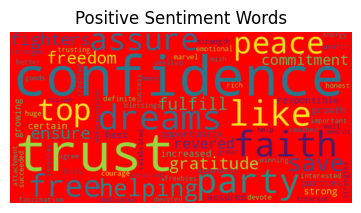

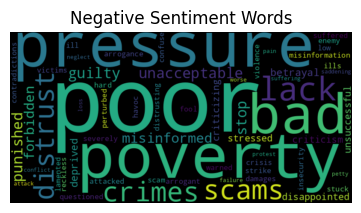

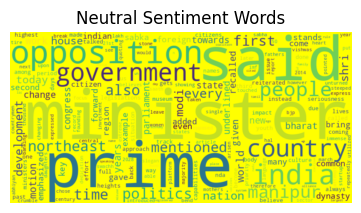

In [45]:
wordcloud_positive = WordCloud(width = 800,height = 400, background_color = 'red').generate_from_frequencies(word_freq_positive)

wordcloud_negative = WordCloud(width = 800,height = 400, background_color = 'black').generate_from_frequencies(word_freq_negative)

wordcloud_neutral = WordCloud(width = 800,height = 400, background_color = 'yellow').generate_from_frequencies(word_freq_neutral)

plt.figure(figsize = ( 15,5))
plt.subplot(131)
plt.imshow(wordcloud_positive,interpolation = 'bilinear')

plt.axis('off')

plt.title("Positive Sentiment Words")


plt.figure(figsize = ( 15,5))
plt.subplot(132)
plt.imshow(wordcloud_negative,interpolation = 'bilinear')
plt.axis('off')

plt.title("Negative Sentiment Words")

plt.figure(figsize = ( 15,5))
plt.subplot(133)
plt.imshow(wordcloud_neutral,interpolation = 'bilinear')
plt.axis('off')

plt.title("Neutral Sentiment Words")

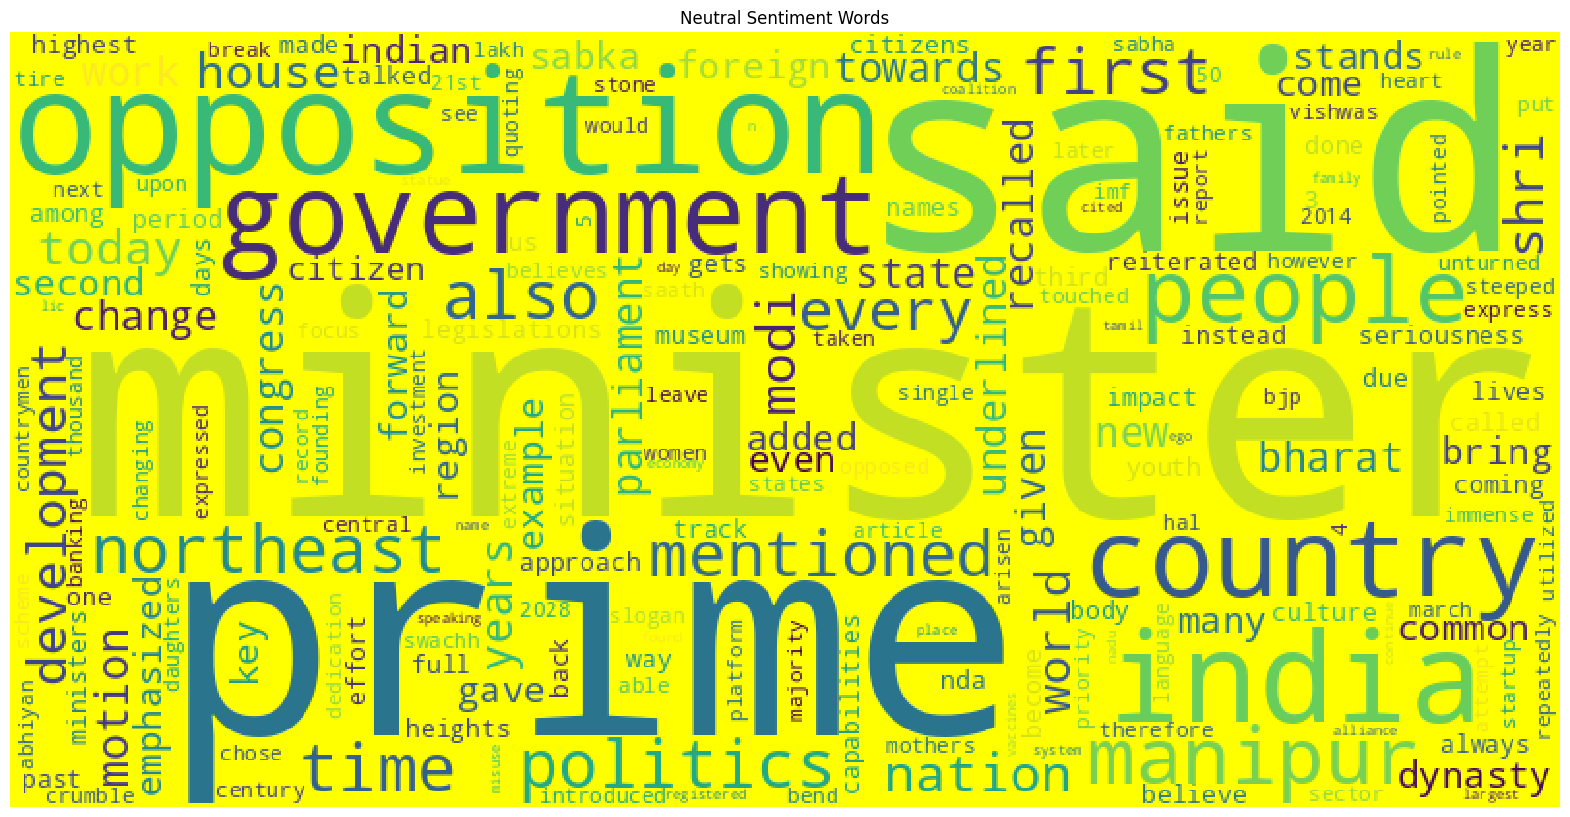

In [48]:
plt.figure(figsize = (20,12))
plt.imshow(wordcloud_neutral,interpolation = 'none')
plt.axis('off')
plt.title("Neutral Sentiment Words")
plt.show()

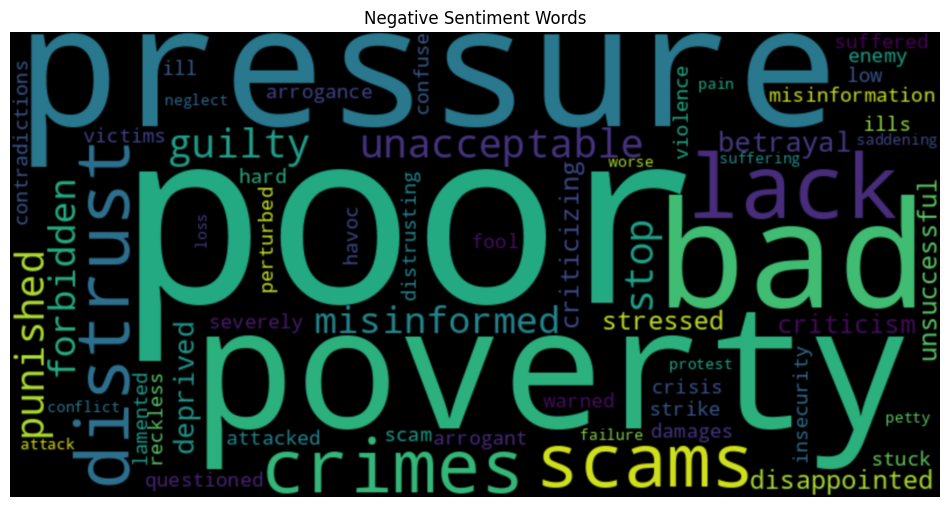

In [51]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud_negative,interpolation = 'bicubic')
plt.axis('off')
plt.title("Negative Sentiment Words")
plt.show()

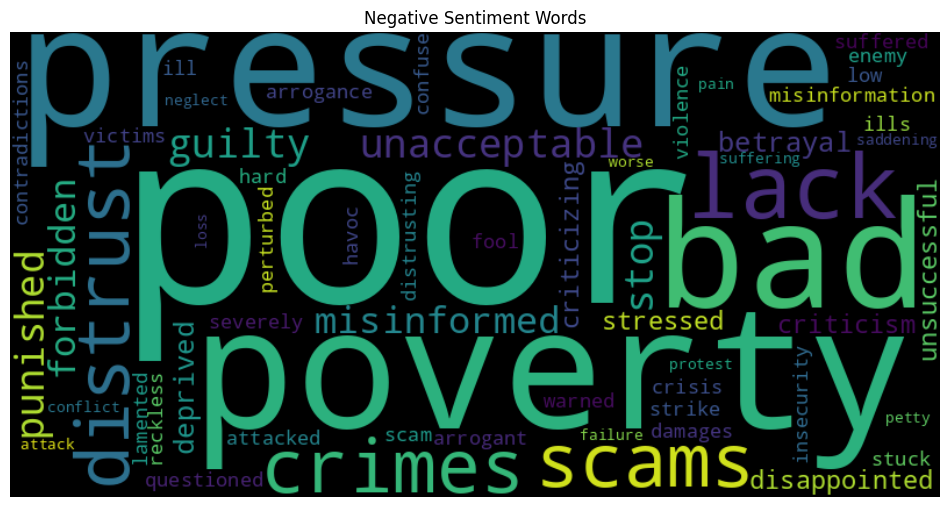

In [54]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud_negative,interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")
plt.show()

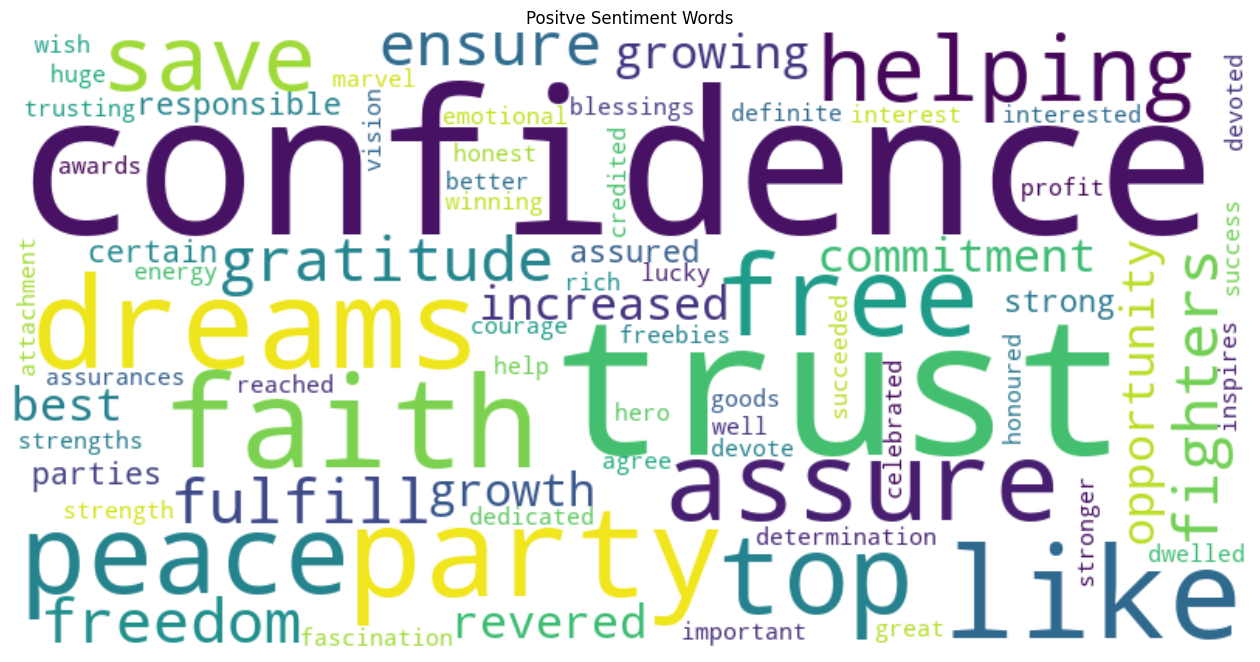

In [ ]:
plt.figure(figsize = (16,12))
plt.imshow(wordcloud_positive,interpolation = 'bilinear')
plt.axis('off')
plt.title("Positve Sentiment Words")
plt.show()